In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [3]:
c = 2.2
dweibull_rv = sts.dweibull(c)  # красивое бимодальное распределение
pdf = dweibull_rv.pdf    # его функция плотности

# за пределами отрезка [-3,3] плотность распределения близка к нулю
x = np.linspace(-3, 3, 100)

# Следующие методы вычисляют теоретические значения статистик для
# заданного распределения из scipy.stats
mean = dweibull_rv.mean()
var = dweibull_rv.var()
print(f'Используется распределение double Weibull с параметром c = \
{c}. Его аналитически рассчитанное матожидание {round(mean, 3)}, а \
дисперсия {round(var, 3)}')

Используется распределение double Weibull с параметром c = 2.2. Его аналитически рассчитанное матожидание 0.0, а дисперсия 0.965


Text(0.5, 0, '$x$')

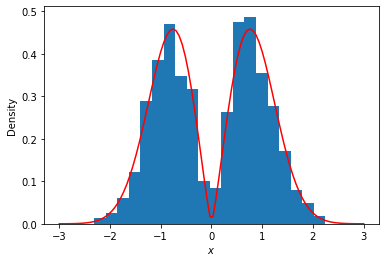

In [4]:
sample = dweibull_rv.rvs(1000)
plt.hist(sample, bins=20, density=True)
plt.plot(x, pdf(x), 'r')
plt.ylabel('Density')
plt.xlabel('$x$')

In [19]:
def mean_for_sample(rv, n, num_samples=1000):
    '''
    Эта функция получает на вход распределение, размер выборки и
    количество выборок и отрисовывает гистограмму распределения
    выборочных средних и ожидаемое из ЦПТ нормальное распределение
    этих выборочных средних
    '''
    
    # Вычисляем выборочные средние и отрисовываем их гистограмму
    
    samples_means = []    # список выборочных средних
    for i in range(num_samples):
        sample = rv.rvs(n)
        samples_means += [sum(sample) / len(sample)]
    plt.hist(samples_means, bins=20, density=True)
    
    # Вычисляем параметры распределения из ЦПТ и рисуем его
    
    mu = mean
    # тут должны быть "выкладки с вычислением параметров", но это
    # одна простая формула
    sigma = np.sqrt(var / n)
    cpt = sts.norm(mu, sigma).pdf
        
    # ось х для отрисовки берем в пределах 4 станд. отклонений
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
    
    plt.plot(x, cpt(x), 'r')
    plt.xlabel('Выборочное среднее')
    plt.ylabel('Плотность распределения средних по выборкам')
    return

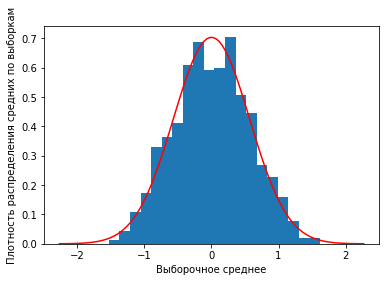

In [20]:
mean_for_sample(dweibull_rv, 3)

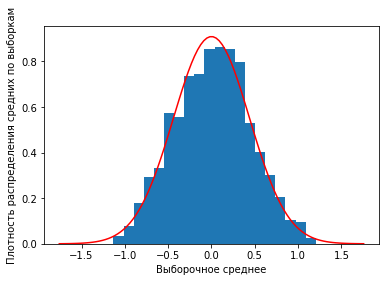

In [21]:
mean_for_sample(dweibull_rv, 5)

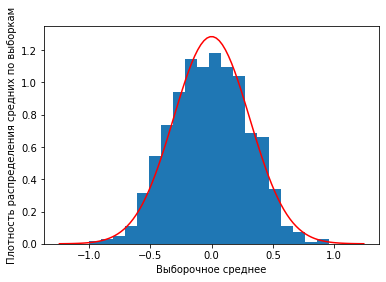

In [22]:
mean_for_sample(dweibull_rv, 10)

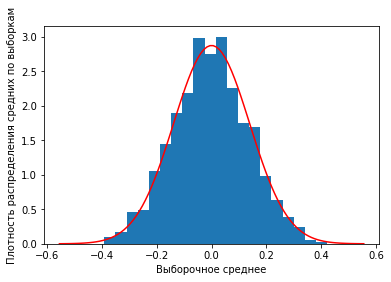

In [23]:
mean_for_sample(dweibull_rv, 50)

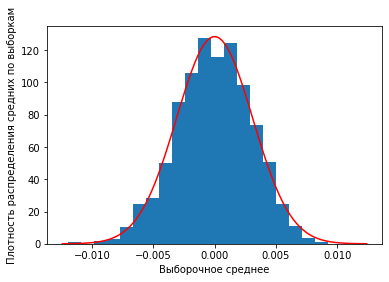

In [24]:
mean_for_sample(dweibull_rv, 100000)

#### Вывод
Бимодальность распределения исчезла (в пределах флуктуаций) уже при
n = 5 (но заметна при n = 3). Гладкость приближения кривой нормального распределения при увеличении n меняется очень слабо (хотя при n = 500) гистограмма все-таки ближе к кривой распредедения, чем при меньших значениях. Но, конечно, увеличение n принципиально уменьшает расброс предсказанных значений среднего по отношению к теоретическому.